# TOPOLOGICAL SORTING

In [2]:
class Graph():
    
    def __init__(self,V,E,directed = False, weighted = False, W = None):
        self.V = V
        self.nV = len(V)
        self.E = E
        self.nE = len(E)
        self.adjMtr = []
        self.adjLst = {}
        self.directed = directed
        self.weighted = weighted
        if self.weighted == True:
            self.W = W #W is a dict with keys are edges and values are their cost.
        
        
        
        
    def adj_matrix(self):
        
        for i in range(len(self.V)):
            self.adjMtr.append([0]*len(self.V))
        
        if self.directed == False and self.weighted == False:
            for i in range(len(self.V)):
                for j in range(len(self.V)):
                    if self.V[i]+self.V[j] in self.E or self.V[j]+self.V[i] in self.E:
                        self.adjMtr[i][j] = 1
                        
        elif self.directed == False and self.weighted == True:
            for i in range(len(self.V)):
                for j in range(len(self.V)):
                    v1 = self.V[i]+self.V[j]
                    v2 = self.V[j]+self.V[i]
                    if v1 in self.E:
                        self.adjMtr[i][j] = self.W[v1]
                    elif v2 in self.E:
                        self.adjMtr[i][j] = self.W[v2]
        
        elif self.directed == True and self.weighted == False:
            for i in range(len(self.V)):
                for j in range(len(self.V)):
                    if self.V[i]+self.V[j] in self.E or (self.V[i],self.V[j]) in self.E:
                        self.adjMtr[i][j] = 1
        
        #elif self.directed == True and self.weighted == True
        else:
            for i in range(len(self.V)):
                for j in range(len(self.V)):
                    if self.V[i]+self.V[j] in self.E:
                        self.adjMtr[i][j] = self.W[self.V[i]+self.V[j]]
                        
                        
                        
    def adj_list(self):
        for i in self.V:
            self.adjLst[i] = set()
        #Not Dir
        if self.directed == False:
            for i in self.V:
                for j in self.E:
                    #not weighted
                    if self.weighted == False:
                        if j[0] == i:
                            self.adjLst[i].add(j[1])
                        elif j[1] == i:
                            self.adjLst[i].add(j[0])
                    #weighted
                    elif self.weighted == True:
                        if j[0] == i:
                            self.adjLst[i].add((j[1],self.W[j]))
                        elif j[1] == i:
                            self.adjLst[i].add((j[0],self.W[j]))
        #Dir
        else:
            for i in self.V:
                for j in self.E:
                    if j[0] == i:
                        #not weighted
                        if self.weighted == False:
                            self.adjLst[i].add(j[1])
                        #weighted
                        elif self.weighted == True:
                            self.adjLst[i].add((j[1],self.W[j]))

                    
    def print_matrix(self):
        strV = str(self.V).replace('[',' ').replace(']',' ').replace("'",'').replace(',','')
        print(' '+strV)
        for i in range(len(self.adjMtr)):
            strG = str(self.adjMtr[i]).replace('[',' ').replace(']',' ').replace(',','')
            print(str(self.V[i])+strG)

# DFS - dead_end

In [3]:
def DFSUtil_topo(G,v,visited,stack,topo):
    visited.append(v)
    stack.append(v)
    for successor in G.adjLst[v]:
        if successor not in visited:
            DFSUtil_topo(G, successor, visited,stack,topo)
    topo.append(stack.pop())
#     print(visited)
#     print(topo[-1])
def DFS_topo(G,v=None):
    visited = []
    stack = []
    topo = []
    if v != None:
        DFSUtil_topo(G,v,visited,stack,topo)
    for i in G.V:
        if i not in visited:
            DFSUtil_topo(G,i,visited,stack,topo)
    #print(visited)
    topo.reverse()
    print(topo)

# Kahn's algorithm - source
    

In [4]:
import copy
def source(G):
    result = set()
    for i in G.adjLst.values():
        for j in i:
            result.add(j)
    return set(G.V).difference(result)
    
def Kahn(G):
    tempE = copy.copy(G.E)
    tempadjLst = copy.deepcopy(G.adjLst)
    tempV = copy.copy(G.V)
    S = source(G)
    #print(f'S1: {S}')
    L = []
    while len(S) > 0:
        L.append(S.pop())
        G.V.remove(L[-1])
        while len(G.adjLst[L[-1]]) > 0:
            temp = G.adjLst[L[-1]].pop()
            #print(temp)
            #print(f'E: {G.E}')
            S = source(G)
            #print(f'S: {S}')
    G.E = tempE
    G.adjLst = tempadjLst
    G.V = tempV
    print(L)
    
    
                

In [5]:
V1 = ['OOP','NMLT','AI','ML','CV']
E1 = [('OOP','AI'), ('NMLT','AI'), ('AI','ML'), ('AI','CV'), ('ML','CV')]
G1 = Graph(V1,E1,directed=True)
G1.adj_matrix()
G1.print_matrix()
G1.adj_list()
G1.adjLst

  OOP NMLT AI ML CV 
OOP 0 0 1 0 0 
NMLT 0 0 1 0 0 
AI 0 0 0 1 1 
ML 0 0 0 0 1 
CV 0 0 0 0 0 


{'OOP': {'AI'}, 'NMLT': {'AI'}, 'AI': {'CV', 'ML'}, 'ML': {'CV'}, 'CV': set()}

In [6]:
DFS_topo(G1)

['NMLT', 'OOP', 'AI', 'ML', 'CV']


In [7]:
Kahn(G1)

['NMLT', 'OOP', 'AI', 'ML', 'CV']


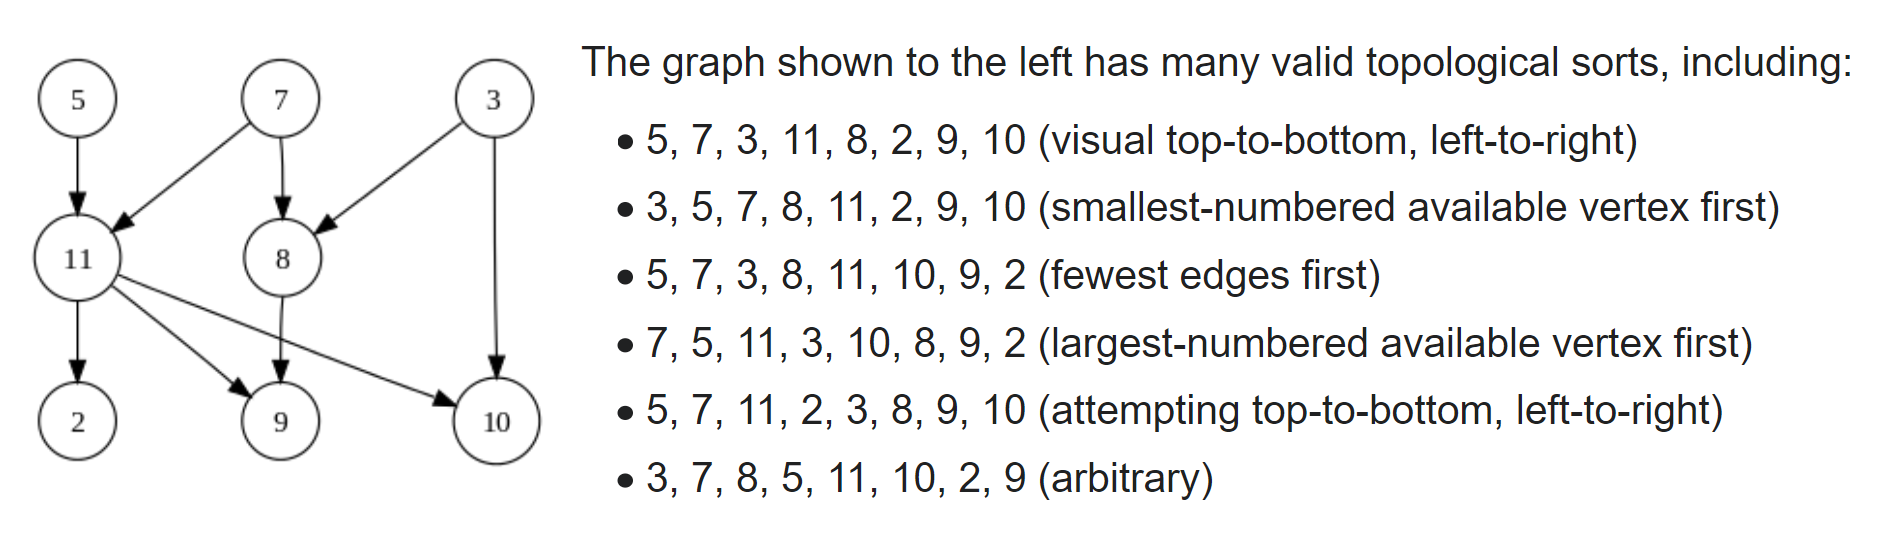

In [8]:
V = [5,7,3,11,8,2,9,10,]
E = [(5,11),(7,11),(7,8),(3,8),(3,10),(11,2),(11,9),(11,10),(8,9)]
tG = Graph(V,E,directed = True)
tG.adj_matrix()
tG.print_matrix()
tG.adj_list()
tG.adjLst

  5 7 3 11 8 2 9 10 
5 0 0 0 1 0 0 0 0 
7 0 0 0 1 1 0 0 0 
3 0 0 0 0 1 0 0 1 
11 0 0 0 0 0 1 1 1 
8 0 0 0 0 0 0 1 0 
2 0 0 0 0 0 0 0 0 
9 0 0 0 0 0 0 0 0 
10 0 0 0 0 0 0 0 0 


{5: {11},
 7: {8, 11},
 3: {8, 10},
 11: {2, 9, 10},
 8: {9},
 2: set(),
 9: set(),
 10: set()}

In [9]:
DFS_topo(tG)

[3, 7, 8, 5, 11, 10, 2, 9]


In [10]:
Kahn(tG)

[3, 5, 7, 8, 11, 9, 2, 10]
